# Function

A function, as in math is a mapping
\begin{align*}
f:X&\longrightarrow Y\\
x &\longmapsto f(x)
\end{align*}

for every input $x$ is returns an output.

It can be first a constant function:

In [3]:
def firstfunc():
    print("Hey you!")
    print("How are you doing?")
    
firstfunc()

Hey you!
How are you doing?


In [5]:
def firstfunc(username):
    print("Hey", username + '!')
    print(username + ',' ,"How do you do?")

firstfunc('Samuel')

Hey Samuel!
Samuel, How do you do?


Up to now the return was just a print.
However if we want to make use of functions as pre-computations or compositions, we should return the value back

In [8]:
def multiply(x, y):
    c = x*y
    return c

multiply(2,5)
multiply(3,multiply(2,3))

18

In the example of the Fibonacci numbers

In [25]:
def fibbo(n):
    a = 1
    b = 2
    if n == 0:
        return a
    else:
        for i in range(1,n):
            a, b = b, a+b
    return b

fibbo(2)

3

## Use of Numpy library

[Numpy](http://www.numpy.org/) is a library that provides all the support in python for array and matrice manipulations as well as core scientific manipulations.

In [26]:
import numpy as np

In [34]:
values = [1, 2.5, 7, 18, 4]
C = np.array(values)

In [35]:
print(values)
print(C)

[1, 2.5, 7, 18, 4]
[  1.    2.5   7.   18.    4. ]


You can do artyhmetics with that

In [41]:
print(C * 9 / 5 + 32)

[ 33.8  36.5  44.6  64.4  39.2]


In [45]:
A = np.array([ [3.4, 8.7, 9.9], 
               [1.1, -7.8, -0.7],
               [4.1, 12.3, 4.8]])
print(A)
print(A.ndim)


[[  3.4   8.7   9.9]
 [  1.1  -7.8  -0.7]
 [  4.1  12.3   4.8]]
2


For further informations such as matrix manipulations, etc. you can have a look at this simple [tutorial](http://www.python-course.eu/numpy.php).

## Use of matplotlib

Matplotlib is a library that is dedicated at producing every possible plots based on datas.
We will illustrate it with a simple example of a stock price modeled as a random walk.

In [49]:
%matplotlib inline

import numpy as np  # this imports the NumPy library
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(context="talk")

We first define our Random walk which is mathematically given as
\begin{equation}
S_0=s,\quad S_t = X_t+S_{t-1}=S_0+\sum_{s=1}^t X_s
\end{equation}
Where 
\begin{equation}
X_t=
\begin{cases}
1 &\text{If I get head for my coin toss}\\
-1 &\text{If I get tail}
\end{cases}
\end{equation}

In [57]:
def random_walk(startprice, days):
    price = np.zeros(days)
    shock = np.round(np.random.rand(days))
    price[0] = startprice
    for i in range(1, days):
        price[i] = price[i-1] + 2*shock[i]-1
    return price

This gives us the generation of sample random walks that we can print

In [60]:
print(random_walk(10, 6))

[ 10.  11.  12.  13.  14.  13.]


We want however to plot it

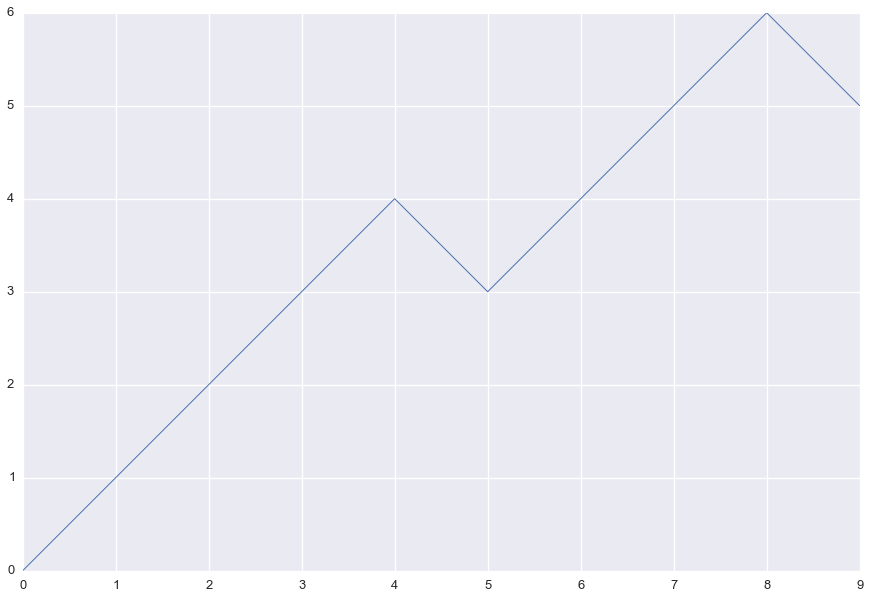

In [75]:
time = 10

fig, axn = plt.subplots(figsize=(15, 10))

_m = axn.plot(random_walk(0, time), label='time', linewidth='1')


We want to plot several paths

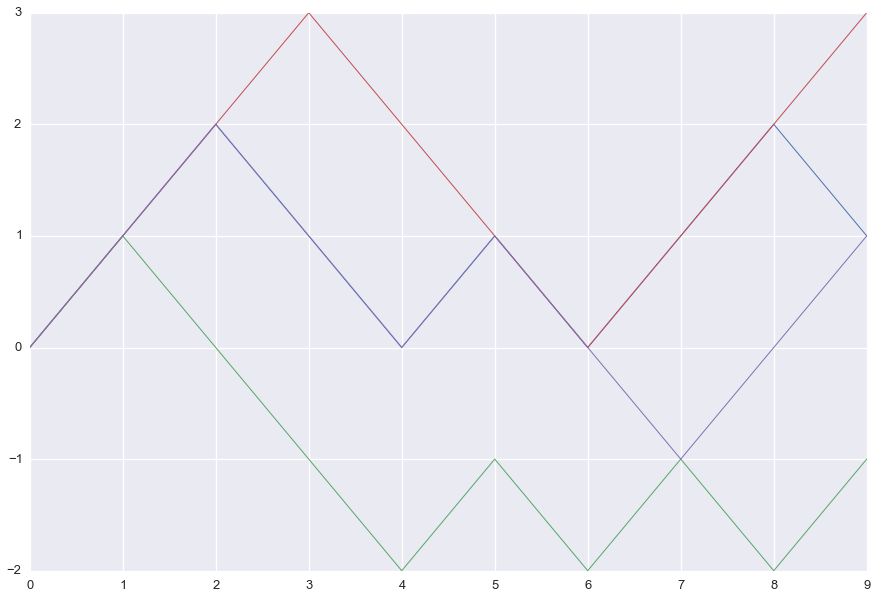

In [78]:
time = 10

fig, axn = plt.subplots(figsize=(15, 10))

for run in range(4):
    axn.plot(random_walk(0, time), label='time', linewidth='1')


We want to plot some stopp loss barrier

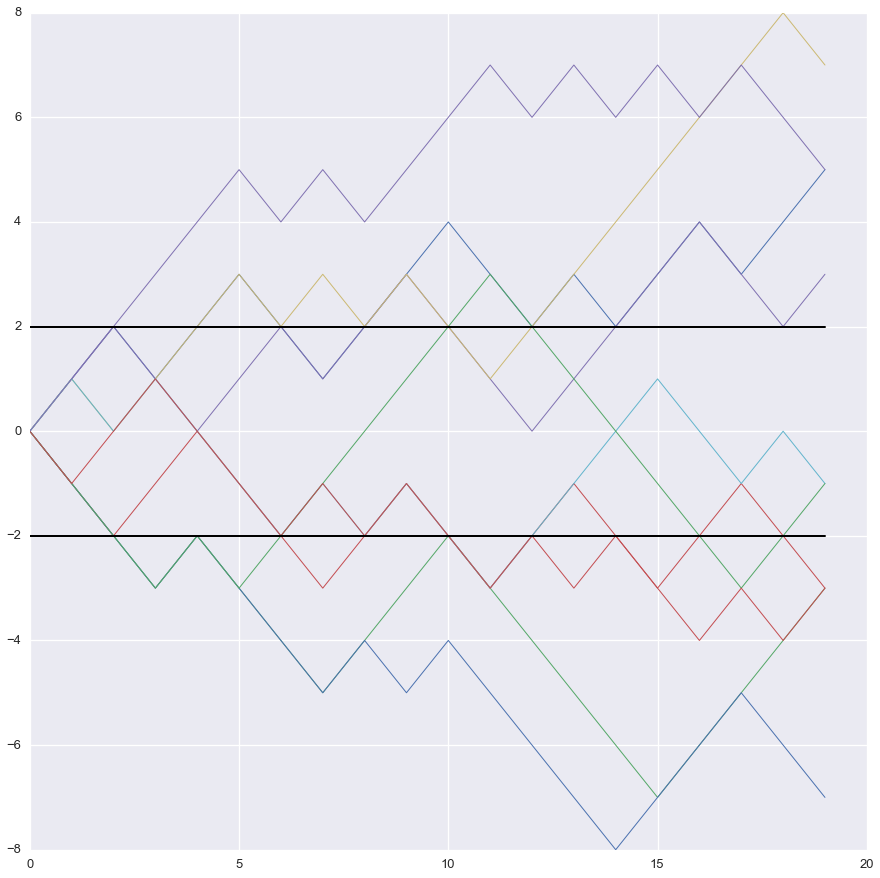

In [74]:
time = 20

fig, axn = plt.subplots(figsize=(15, 15))

for run in range(10):
    axn.plot(random_walk(0, time), label='time', linewidth='1')

axn.plot([0, time-1], [-2, -2], color='k', linestyle='-', linewidth=2)
axn.plot([0, time-1], [2, 2], color='k', linestyle='-', linewidth=2)
